In [71]:
import pandas as pd

# Preprocessing
from nltk.stem import WordNetLemmatizer


# visualization
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud

# Tokenization 
from sklearn.feature_extraction.text import TfidfVectorizer

# Modelling
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# scoring
from sklearn.metrics import accuracy_score, f1_score


In [28]:
data = pd.read_csv('Startup_Description.csv')

In [29]:
# the data contains descriptions of what different startups do.
data.head()

,Startup_Description
0,1. The main idea behind the establishment of ...
1,New company that is in the process of regist...
2,"A make in India startup, with a philosophy t..."
3,Company based in Panama City that created an...
4,Have served hundreds of clients. Company ha...


In [30]:
data.shape

(344, 1)

In [31]:
# Applying NLP techniques
def lemmatizee(the_list):
    # Lemmatizer function using the returning default part of speech(noun) for each word passed through it
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(a) for a in the_list.split()]

def BOW(data, max_feat= 500):
    # removing symbols from the dataset
    data['Startup_Description'].replace(r'[^\w]+', ' ', regex = True, inplace = True)
    
    # tokenizing words and making the vectors
    vectorizer=TfidfVectorizer(max_features= max_feat, stop_words= 'english', tokenizer= 
                                   lemmatizee)
        
    char_array_tr = vectorizer.fit_transform(data.Startup_Description).toarray()
        
    # Turning into dataframes
    data = pd.DataFrame(char_array_tr, columns= vectorizer.get_feature_names_out())
    return data

In [32]:
train_data = BOW(data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [33]:
data

,Startup_Description
0,1 The main idea behind the establishment of t...
1,New company that is in the process of registr...
2,A make in India startup with a philosophy to ...
3,Company based in Panama City that created and...
4,Have served hundreds of clients Company has 2...
...,...
339,Startup that belongs to a group of companies ...
340,Started operations 3 years ago and officially...
341,Company develops and produces customized mobi...
342,Quadvision Infosystems is a Pvt Ltd company c...


In [34]:
# Using Kmeans on the dataset
k_range = range(2, 15)
sse = list()
for k in k_range:
    kmd = KMeans(n_clusters= k)
    kmd.fit(train_data)
    sse.append(kmd.inertia_)

([<matplotlib.axis.XTick at 0x20496bd0fd0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14')])

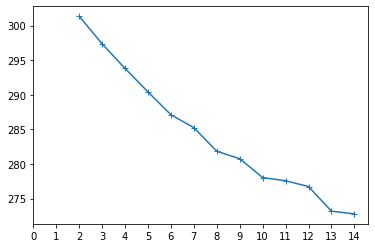

In [35]:
plt.plot(k_range, sse, marker= '+')
plt.xticks(range(15))


In [36]:
# we get up to 13 clusters 

In [37]:
kmeans = KMeans(n_clusters= 13)
label = kmeans.fit_predict(train_data)

In [38]:
data['category'] = label

In [39]:
data.head(30)

,Startup_Description,category
0,1 The main idea behind the establishment of t...,6
1,New company that is in the process of registr...,7
2,A make in India startup with a philosophy to ...,2
3,Company based in Panama City that created and...,8
4,Have served hundreds of clients Company has 2...,4
5,We are an innovative selfsustainable business...,6
6,We are a company focused on the production of...,5
7,Real estate construction company incorporated...,10
8,A platform connecting photographers and busin...,8
9,We are an ecommerce platform that aims to sel...,8


<ipython-input-40-f2ecdc73966f>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,4,k+1)


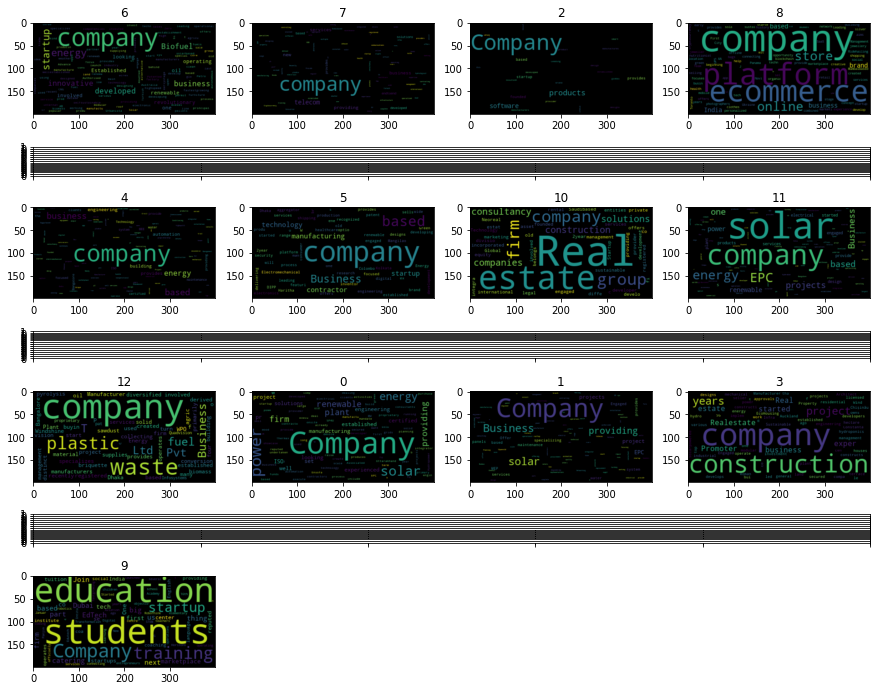

In [40]:
# common words across categories
fig, ax = plt.subplots(len(data['Startup_Description'].unique()), sharex=True, figsize=(15,len(data['category'].unique())))
k = 0
for i in data['category'].unique():
    df_4 = data[data['category'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_4['Startup_Description']
                                                                                              .to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1
#plt.savefig('gg', dpi= 500, quality= 98)

In [41]:
# Energy related Clusters are cluster 0,1,6,11 about technology is cluster 5. So labels will be mapped to meet our desire.
def mapp(val):
    if val in [0,1,6,11]:
        return 'Sustainable Energy'
    elif val == 5:
        return 'Tech'
    else:
        return 'others'

data['category_needed'] = data['category'].apply(mapp) 

In [42]:
data

,Startup_Description,category,category_needed
0,1 The main idea behind the establishment of t...,6,Sustainable Energy
1,New company that is in the process of registr...,7,others
2,A make in India startup with a philosophy to ...,2,others
3,Company based in Panama City that created and...,8,others
4,Have served hundreds of clients Company has 2...,4,others
...,...,...,...
339,Startup that belongs to a group of companies ...,10,others
340,Started operations 3 years ago and officially...,9,others
341,Company develops and produces customized mobi...,2,others
342,Quadvision Infosystems is a Pvt Ltd company c...,12,others


In [43]:
# data.to_csv('Startup_Categories1.csv', index = False)

## Creating the Supervised learning model

In [45]:
model_data = pd.read_csv('Startup_Categories1.csv')

In [47]:
# preprocessing the data
y = model_data.category_needed
X_data = BOW(model_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.25, random_state=42, 
                                                    stratify = model_data.category_needed)

## Logistics Regression

In [51]:
log = LogisticRegression()

In [52]:
log.fit(X_train, y_train)

LogisticRegression()

In [54]:
pre = log.predict(X_test)

In [55]:
accuracy_score(y_test, pre)

0.8488372093023255

In [58]:
f1_score(y_test, pre, average= 'macro')

0.5760638573575908

## Random Forest

In [66]:
rf = RandomForestClassifier()

In [67]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
pred = rf.predict(X_test)

In [69]:
accuracy_score(y_test, pred)

0.7790697674418605

In [70]:
f1_score(y_test, pred, average= 'macro')

0.526984126984127

## Random Forest

In [72]:
xg = XGBClassifier()

In [73]:
xg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:37:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [75]:
pred_xg = xg.predict(X_test)

In [76]:
accuracy_score(y_test, pred_xg)

0.7906976744186046

In [77]:
f1_score(y_test, pred_xg, average= 'macro')

0.5333333333333333

# We hope to improve on this with time or find a better way of getting the categories. 